# Instalación de las librerías

In [1]:
%pip install pint

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install modsimpy

Note: you may need to restart the kernel to use updated packages.


# Modelo poblacional
Vamos a simular con un modelo la obtención de datos históricos de población ya conocidos. Es decir, vamos a ajustar un modelo a estos datos, para obtener las ecuaciones que modelan al sistema.
Al obtener el modelo poblacional podemos llegar a estimar la población en los sgtes. años.
Los datos poblacionales los obtendremos de un artículo de wikipedia acerca de la población mundial.

Importamos las liberías y obtenemos las tablas del artículo

In [3]:
from pandas import read_html
import pandas as pd
import modsim as ms

# Traemos la tabla de Wikipedia
url = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"
tablas = pd.read_html(url, header=0, index_col=0, decimal="M")
tabla_poblacion = tablas[2]

Le modificamos los nombres a las columnas para luego trabar sólo con dos de ellas.

In [4]:
tabla_poblacion.columns = [
    "census",
    "prb",
    "un",
    "maddison",
    "hyde",
    "tanton",
    "biraben",
    "mj",
    "thomlinson",
    "durand",
    "clark",
]

Dividimos los valores de población por 1x10^9 para que nos queden más cómodos para trabajar

In [5]:
censo = tabla_poblacion.census / 1e9
un = tabla_poblacion.un / 1e9

Graficamos los datos de los dos censos.

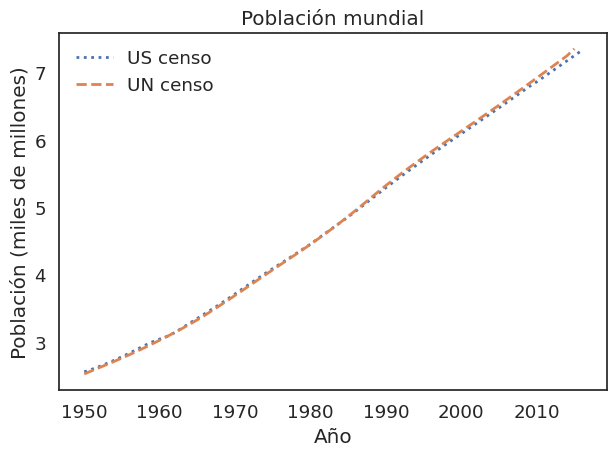

In [6]:
ms.plot(censo, ":", label="US censo")
ms.plot(un, "--", label="UN censo")
ms.decorate(
    title="Población mundial",
    xlabel="Año",
    ylabel="Población (miles de millones)"
)

# Ejercicio: 
Graficar en un mismo gráfico las tres curvas de proyecciones, el modelo cuadrático, el modelo alpha y los datos de los expertos. Además, deben visualizarse los datos hitóricos. Responder teniendo en cuenta las poroyecciones de los expertos: 

1. ¿Cuál será el mejor modelo* para estimar poblaciones en el año 2050? 
2. ¿Cuál será el mejor modelo* para estimar poblaciones en el año 2100? 

*hace referencia a uno de los que nosotros programamos.

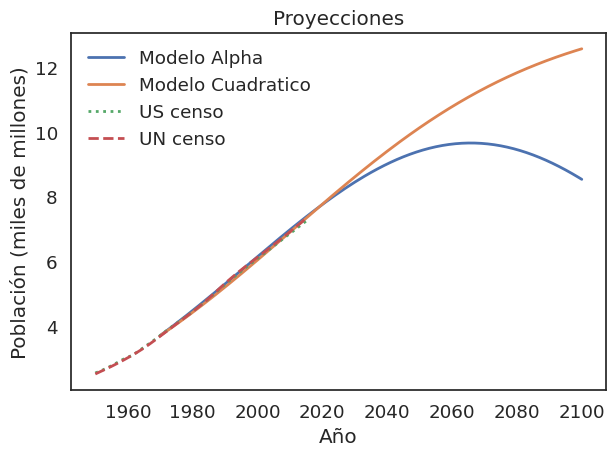

In [7]:
# Definimos la recta
def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)


# Creamos un rango de años
ts = ms.linrange(1960, 2100)

# Creamos el modelo con la recta alpha
alpha_model = ms.TimeSeries(recta_alpha(ts), ts)

# Definimos el sistema
t_0 = 1970
t_end = 2100
p_0 = censo[t_0]

sistema = ms.System(
    t_0=t_0,  # Año inicial
    t_end=t_end,  # Año final
    p_0=p_0,  # Población inicial
    alpha=0.025,  # Tasa de crecimiento
    beta=-0.0018,  # Tasa de crecimiento cuadrático
    funcion_alpha=recta_alpha,  # Función alpha
)


def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t] ** 2
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t + 1] = step_func(resultado, t, sistema)
    return resultado


# Ejecutamos la simulación
resultado_cuad = run_simulation(sistema, step_cuadratico)
resultado_alpha = run_simulation(sistema, step_alphadiff)

# Graficamos los resultados
ms.plot(resultado_alpha, label="Modelo Alpha")
ms.plot(resultado_cuad, "-", label="Modelo Cuadratico")
ms.plot(censo, ":", label="US censo")
ms.plot(un, "--", label="UN censo")
ms.decorate(title="Proyecciones", xlabel="Año", ylabel="Población (miles de millones)")

## Conclusiones

1. ¿Cuál será el mejor modelo para estimar poblaciones en el año 2050?

    El modelo cuadrático puede ser mejor para 2050 porque todavía puede haber un crecimiento exponencial de la población en ese momento.

2. ¿Cuál será el mejor modelo para estimar poblaciones en el año 2100?

    El modelo alfa puede ser mejor para 2100 porque se espera que la tasa de crecimiento de la población se estabilice en ese momento.

La elección del mejor modelo depende del período de tiempo que se desea predecir. En este caso, el modelo cuadrático es mejor a corto plazo y el modelo alfa es mejor a largo plazo.